# 국가별 코로나 백신 접종률 
____

#### 사용 데이터
- [COVID-19 World Vaccination Progress](https://www.kaggle.com/datasets/gpreda/covid-world-vaccination-progress)
- [Michelin Guide Restaurants 2021](https://www.kaggle.com/datasets/ngshiheng/michelin-guide-restaurants-2021)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

국가별 누적접종률을 알아야 함 <br/>
1. 국가별로 날짜마다 접종률이 저장되어 있음(people_vaccinated_per_hundred)
2. 가장 최신의 정보가 가장 마지막 데이터로 저장되어 있음
3. country 컬럼이 중복되는 모든 데이터를 지우되 마지막 데이터만 남기면 최신의 국가별 접종률을 알 수 있음

In [4]:
data=pd.read_csv('./country_vaccinations.csv')
data=data.drop_duplicates('country', keep='last')

In [5]:
data=data.fillna(0)
data=data.sort_values(by='people_vaccinated_per_hundred')
data

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
12201,Bulgaria,BGR,2022-03-29,4348404.0,0.0,2049909.0,1845.0,1395.0,63.05,0.00,29.72,202.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Ministry of Health,https://coronavirus.bg/bg/statistika
49886,Mauritius,MUS,2022-03-24,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,"Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing",World Health Organization,https://africacdc.org/covid-19-vaccination/
50737,Moldova,MDA,2022-03-29,2123778.0,0.0,1054472.0,2709.0,1164.0,52.78,0.00,26.20,289.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",Ministry of Health,https://vaccinare.gov.md
62208,Philippines,PHL,2022-03-29,148799120.0,0.0,65804988.0,0.0,1182486.0,134.00,0.00,59.26,10649.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Department of Health via ABS-CBN Investigative...,https://news.abs-cbn.com/spotlight/multimedia/...
63652,Qatar,QAT,2022-03-29,6607185.0,0.0,0.0,4126.0,7901.0,225.46,0.00,0.00,2696.0,"Moderna, Pfizer/BioNTech",Ministry of Public Health,https://covid19.moph.gov.qa/EN/Pages/Vaccinati...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63189,Portugal,PRT,2022-03-10,22923599.0,9663542.0,9415073.0,5453.0,6346.0,225.45,95.04,92.60,624.0,"Johnson&Johnson, Moderna, Oxford/AstraZeneca, ...",Directorate General for Health via Data Scienc...,https://github.com/dssg-pt/covid19pt-data
81916,United Arab Emirates,ARE,2022-03-29,24463702.0,9890318.0,9603499.0,0.0,8442.0,244.86,98.99,96.12,845.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",National Emergency Crisis and Disaster Managem...,https://fcsc.gov.ae/en-us/Pages/Covid19/UAE-Co...
62293,Pitcairn,PCN,2021-09-07,94.0,47.0,47.0,0.0,0.0,200.00,100.00,100.00,0.0,Oxford/AstraZeneca,SPC Public Health Division,https://stats.pacificdata.org/vis?tm=covid&pg=...
57358,Niue,NIU,2022-03-13,4161.0,1650.0,1417.0,0.0,14.0,257.81,102.23,87.79,8674.0,Pfizer/BioNTech,SPC Public Health Division,https://covid19.who.int/


- "all" : 국가별 전 세계의 코로나 접종률 그래프
- " over 50%" 그래프 : 코로나 접종률 50퍼센트가 넘는 국가만 필터링한 그래프 

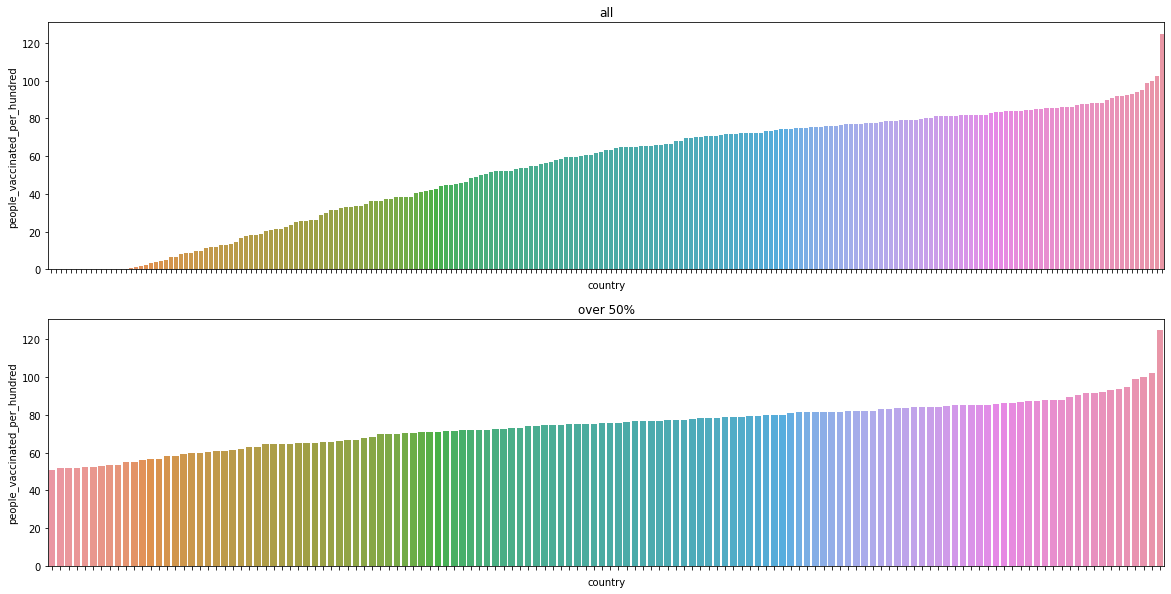

In [7]:
plt.figure(figsize=(20,10))

plt.subplot(211)
g1=sns.barplot(data=data,x='country', y='people_vaccinated_per_hundred')
plt.title("all")

plt.subplot(212)
g2=sns.barplot(data=data[data['people_vaccinated_per_hundred']>=50], x='country', y='people_vaccinated_per_hundred')
plt.title("over 50%")

g1.set(xticklabels=[])
g2.set(xticklabels=[])
plt.show()

- countries : 2021 미슐랭 음식점들이 포함된 국가들이 포함된 list
- g1: 미슐랭 음식점들이 포함된 국가 배열을 x축으로, 코로나 백신 접종률(people_vaccinated_per_hundred)을 y축으로 하는 그래프<br/>

❗️ countries에 China가 포함되어 있으나, China의 백신 접종률 정보가 NaN인 상태이기 때문에 그래프 상에서 표현되지 않도록 countries 배열에서 China를 삭제함

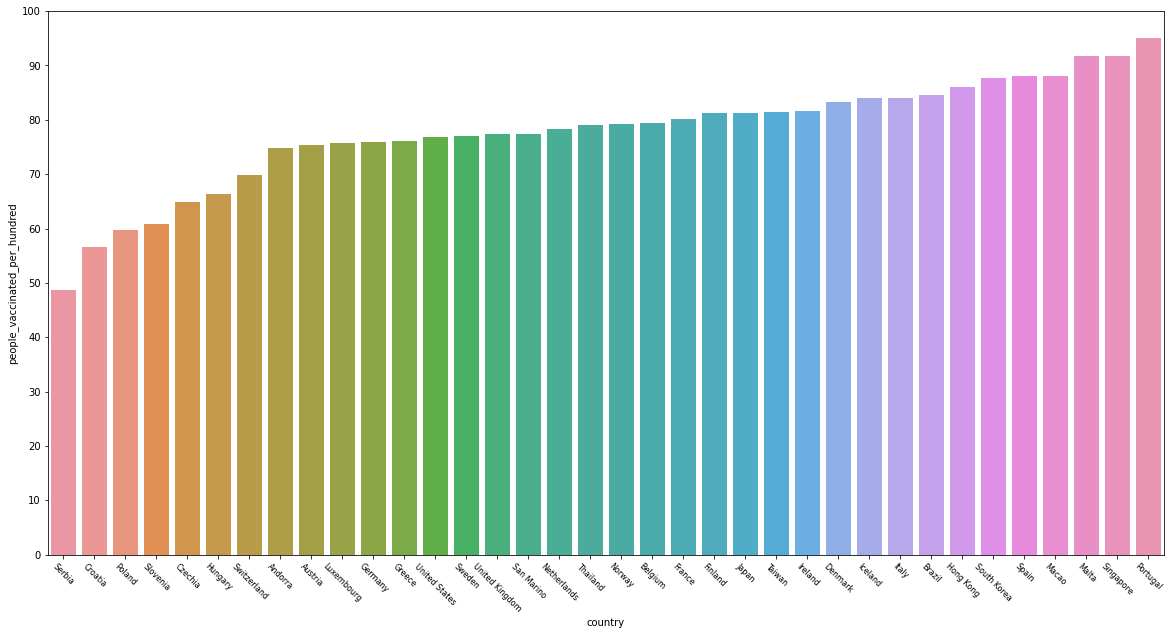

In [6]:
michelin=pd.read_csv('./michelin_my_maps.csv')

countries = set([])
for i in michelin['Address']:
  country_name = i.split(', ')[-1]
  countries.add(country_name)

countries=list(countries)
# 미슐랭 데이터와 백신 접종률 데이터의 국가명이 맞지 않아서 countries의 데이터 이름을 바꿔줌 
countries[countries.index('China Mainland')]='China'
countries[countries.index('Taipei & Taichung')]='Taiwan'
countries[countries.index('Macau')]='Macao'
countries[countries.index('Czech Republic')]='Czechia'

# China 삭제
countries.remove('China')

filteredData=data.loc[data['country'].isin(countries)]

plt.figure(figsize=(20,10))

g1=sns.barplot(data=filteredData,x='country', y='people_vaccinated_per_hundred')
g1.set_xticklabels(g1.get_xticklabels(),rotation=-45, size=8)
g1.set_yticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()